<a href="https://colab.research.google.com/github/Kanch-prog/Analysing_SP_Used_Cars/blob/main/used_cars.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#analyzing selling price of used cars
#loads the data from a csv file and assgn meaningful column names
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/output.csv')
df.head()

headers = ["symboling", "normalized-losses", "make",
           "fuel-type", "aspiration","num-of-doors",
           "body-style","drive-wheels", "engine-location",
           "wheel-base","length", "width","height", "curb-weight",
           "engine-type","num-of-cylinders", "engine-size",
           "fuel-system","bore","stroke", "compression-ratio",
           "horsepower", "peak-rpm","city-mpg","highway-mpg","price"]

df.columns=headers
df.head()



,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [ ]:
#finding the missing values to decide on further steps like imputation
df.isna().any()
df.isnull().any()

symboling            False
normalized-losses    False
make                 False
fuel-type            False
aspiration           False
num-of-doors         False
body-style           False
drive-wheels         False
engine-location      False
wheel-base           False
length               False
width                False
height               False
curb-weight          False
engine-type          False
num-of-cylinders     False
engine-size          False
fuel-system          False
bore                 False
stroke               False
compression-ratio    False
horsepower           False
peak-rpm             False
city-mpg             False
highway-mpg          False
price                False
dtype: bool

In [ ]:
#converting mpg to Litre/100km as it is more commonly used unit.
df['city-mpg'] = 235/df['city-mpg']
df.rename(columns = {'city_mpg':"city-L/100km"}, inplace = True)
print(df.columns)
df.dtypes

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')


symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg             float64
highway-mpg            int64
price                 object
dtype: object

In [ ]:
#removes rows with missing data and price is of object type(string), it should be int or float.
df.price.unique()
df = df[df.price != '?']
df['price'] = df['price'].astype('int')
df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg             float64
highway-mpg            int64
price                  int64
dtype: object

0         Low
1         Low
2         Low
3         Low
4         Low
        ...  
200       Low
201    Medium
202    Medium
203    Medium
204    Medium
Name: price-binned, Length: 201, dtype: category
Categories (3, object): ['Low' < 'Medium' < 'High']


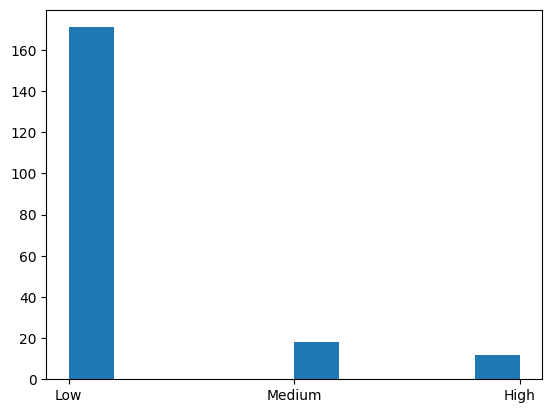

In [ ]:
#normalizing values using simple feature scaling method values range of [0,1]. helps comparing features that are on different scales.
df['length'] = df['length']/df['length'].max()
df['width'] = df['width']/df['width'].max()
df['height'] = df['height']/df['height'].max()

# binning- grouping values ->continuous price values into discrete categories (low, medium, high). useful fo rcategorical analysis.
bins = np.linspace(min(df['price']), max(df['price']), 4)
group_names = ['Low', 'Medium', 'High']
df['price-binned'] = pd.cut(df['price'], bins,
                              labels = group_names,
                              include_lowest = True)

print(df['price-binned'])
plt.hist(df['price-binned'])
plt.show()

In [ ]:
#converting categorical variables (like fuel type) to numerical ones using one-hot encoding.
pd.get_dummies(df['fuel-type']).head()
df.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg,price
count,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.840796,98.797015,0.837102,0.915126,0.899108,2555.666667,126.875622,10.164279,9.944145,30.686567,13207.129353
std,1.254802,6.066366,0.059213,0.029187,0.040933,517.296727,41.546834,4.004965,2.534599,6.815150,7947.066342
min,-2.000000,86.600000,0.678039,0.837500,0.799331,1488.000000,61.000000,7.000000,4.795918,16.000000,5118.000000
25%,0.000000,94.500000,0.801538,0.890278,0.869565,2169.000000,98.000000,8.600000,7.833333,25.000000,7775.000000
50%,1.000000,97.000000,0.832292,0.909722,0.904682,2414.000000,120.000000,9.000000,9.791667,30.000000,10295.000000
75%,2.000000,102.400000,0.881788,0.925000,0.928094,2926.000000,141.000000,9.400000,12.368421,34.000000,16500.000000
max,3.000000,120.900000,1.000000,1.000000,1.000000,4066.000000,326.000000,23.000000,18.076923,54.000000,45400.000000


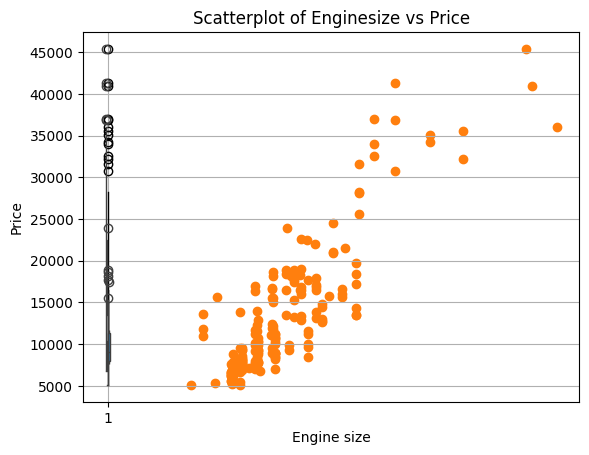

In [ ]:
#boxplot to visualize the distributino of price data and how it varies with another categorical varible. helps identifying outliers and understand the spread of prices.
plt.boxplot(df['price'])
# by using seaborn
sns.boxplot(x ='drive-wheels', y ='price', data = df)

#Scatter plots show the relationship between two numerical variables (engine size and price). This helps in visualizing trends, correlations, and potential linear relationships.
# Predicting price based on engine size
# Known on x and predictable on y
plt.scatter(df['engine-size'], df['price'])
plt.title('Scatterplot of Enginesize vs Price')
plt.xlabel('Engine size')
plt.ylabel('Price')
plt.grid()
plt.show()

In [ ]:
# grouping and pivot tables summarize data by categorical variables
test = df[['drive-wheels', 'body-style', 'price']]
data_grp = test.groupby(['drive-wheels', 'body-style'],
                         as_index = False).mean()

data_grp

,drive-wheels,body-style,price
0,4wd,hatchback,7603.000000
1,4wd,sedan,12647.333333
2,4wd,wagon,9095.750000
3,fwd,convertible,11595.000000
4,fwd,hardtop,8249.000000
5,fwd,hatchback,8396.387755
6,fwd,sedan,9811.800000
7,fwd,wagon,9997.333333
8,rwd,convertible,23949.600000
9,rwd,hardtop,24202.714286


In [ ]:
#pivot methof
df_pivot = data_grp.pivot(index = 'drive-wheels',
                     columns = 'body-style')
df_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  NaN           NaN   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

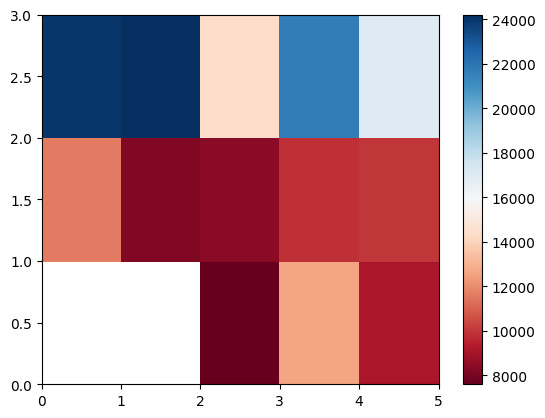

In [ ]:
#heatmap visualizes these summaries, helping identify patterns and relationships between categorical variables and price.
plt.pcolor(df_pivot, cmap = 'RdBu')
plt.colorbar()
plt.show()

F_onewayResult(statistic=0.19744030127462606, pvalue=0.6609478240622193)


(0.0, 53708.81379629226)

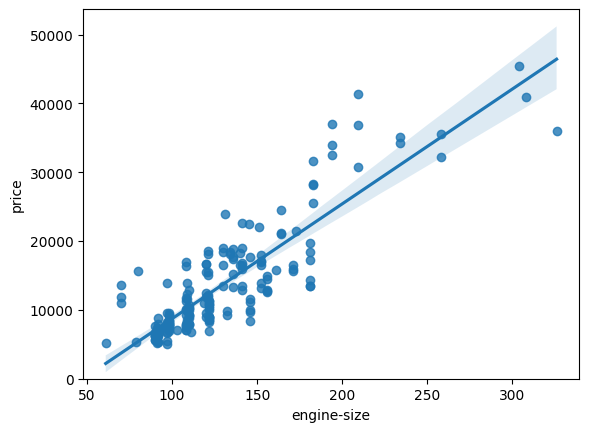

In [ ]:
# Analysis of Variance- ANOVA
#ANOVA tests compare the means of different groups to see if they are significantly different. This is used here to determine if car brand (make) significantly affects prices.
# returns f-test and p-value
# f-test = variance between sample group means divided by
# variation within sample group
# p-value = confidence degree
data_annova = df[['make', 'price']]
grouped_annova = data_annova.groupby(['make'])
annova_results_l = sp.stats.f_oneway(
                             grouped_annova.get_group('honda')['price'],
                             grouped_annova.get_group('subaru')['price']
                                    )
print(annova_results_l)

# strong corealtion between a categorical variable
#Regression plots show the relationship between a predictor (engine size) and the response variable (price). This helps in identifying linear relationships and the strength of these relationships.
# if annova test gives large f-test and small p-value

# Correlation- measures dependency, not causation
sns.regplot(x ='engine-size', y ='price', data = df)
plt.ylim(0, )